In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Generate a large dataset with missing values
np.random.seed(42)
num_rows = 10000
data = {
    'Feature1': np.random.normal(0, 1, num_rows),
    'Feature2': np.random.choice([1, 2, 3, 4, np.nan], num_rows),
    'Feature3': np.random.choice([10,11,12,13,14,15,16,17,18,19,20, np.nan], num_rows),
    'Target': np.random.randint(20, 30, num_rows)
}

In [25]:
df = pd.DataFrame(data)
df.head(20)

,Feature1,Feature2,Feature3,Target
0,0.496714,2.0,13.0,21
1,-0.138264,1.0,12.0,21
2,0.647689,NaN,19.0,23
3,1.523030,2.0,16.0,20
4,-0.234153,1.0,14.0,25
5,-0.234137,NaN,12.0,29
6,1.579213,4.0,15.0,24
7,0.767435,2.0,NaN,29
8,-0.469474,4.0,15.0,28
9,0.542560,3.0,15.0,21


In [29]:
# Visualize missing values
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
Feature1       0
Feature2    1978
Feature3     856
Target         0
dtype: int64


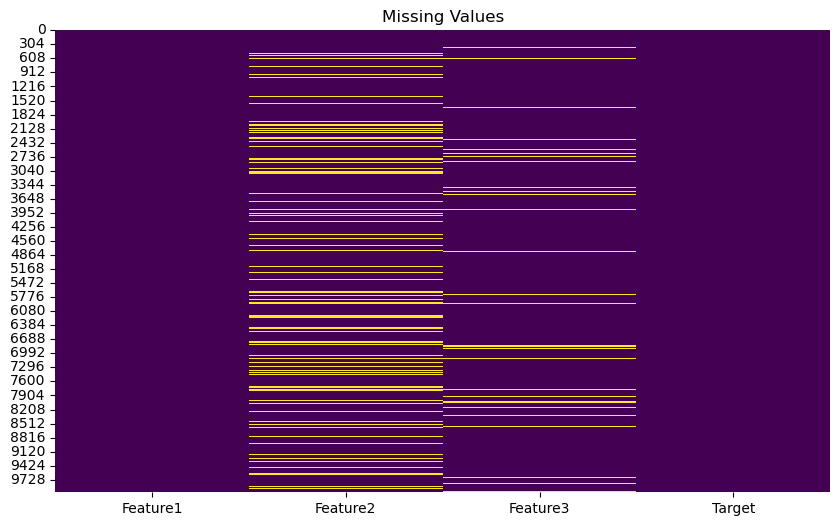

In [26]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [44]:
data = pd.DataFrame()
for i in range(len(df)):
    if pd.notna(df['Feature2'][i]) and pd.notna(df['Feature3'][i]):
        data = data.append(df.iloc[i], ignore_index=True)

C:\Users\sunny vybhav\AppData\Local\Temp\ipykernel_10264\3202607713.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df.iloc[i], ignore_index=True)


In [45]:
data.head(20)

,Feature1,Feature2,Feature3,Target
0,0.496714,2.0,13.0,21.0
1,-0.138264,1.0,12.0,21.0
2,1.523030,2.0,16.0,20.0
3,-0.234153,1.0,14.0,25.0
4,1.579213,4.0,15.0,24.0
5,-0.469474,4.0,15.0,28.0
6,0.542560,3.0,15.0,21.0
7,0.241962,2.0,19.0,29.0
8,-1.724918,3.0,16.0,29.0
9,-1.012831,1.0,19.0,23.0


In [60]:
X = data[['Feature1', 'Target']]
y1 = data['Feature2']
y2 = data['Feature3']

In [63]:
# Create a Linear Regression model for Feature2
regression_model1 = LinearRegression()

# Fit the model to the training data for Feature2
regression_model1.fit(X, y1)

# Predict missing values for 'Feature2' using the regression model for Feature2
predicted_feature2 = regression_model1.predict(df[['Feature1', 'Target']])

# Fill in missing values for 'Feature2' with the predicted values
df['Feature2'].fillna(pd.Series(predicted_feature2), inplace=True)

In [64]:
# Create a Linear Regression model for Feature3
regression_model2 = LinearRegression()

# Fit the model to the training data for Feature3
regression_model2.fit(X, y2)

# Predict missing values for 'Feature3' using the regression model for Feature3
predicted_feature3 = regression_model2.predict(df[['Feature1', 'Target']])

# Fill in missing values for 'Feature3' with the predicted values
df['Feature3'].fillna(pd.Series(predicted_feature3), inplace=True)

In [65]:
df.head(20)

,Feature1,Feature2,Feature3,Target
0,0.496714,2.000000,13.000000,21
1,-0.138264,1.000000,12.000000,21
2,0.647689,2.506893,19.000000,23
3,1.523030,2.000000,16.000000,20
4,-0.234153,1.000000,14.000000,25
5,-0.234137,2.496026,12.000000,29
6,1.579213,4.000000,15.000000,24
7,0.767435,2.000000,14.999561,29
8,-0.469474,4.000000,15.000000,28
9,0.542560,3.000000,15.000000,21


In [66]:
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64
